Load Data

Number of Images


Data Balance

Plotting Image Sizes


#Viewing a Sampling of Images

Data Preparation

Feature Engineering


Configure the dataset for performance

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 101, 101, 32)   │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     2,560,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,617,313 (9.98 MB)

 Trainable params: 2,617,313 (9.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.5732 - loss: 0.8661 - val_accuracy: 0.6500 - val_loss: 0.6460
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.6624 - loss: 0.6432 - val_accuracy: 0.6500 - val_loss: 0.6535
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.6624 - loss: 0.6429 - val_accuracy: 0.6500 - val_loss: 0.6559
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.6624 - loss: 0.6450 - val_accuracy: 0.6500 - val_loss: 0.6470
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.6624 - loss: 0.6439 - val_accuracy: 0.6500 - val_loss: 0.6580
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.6624 - loss: 0.6449 - val_accuracy: 0.6500 - val_loss: 0.6458
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.6624 - loss: 0.6432 - val_accuracy: 0.6500 - val_loss: 0.6556
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.6624 - loss: 0.6446 - val_accuracy: 0.

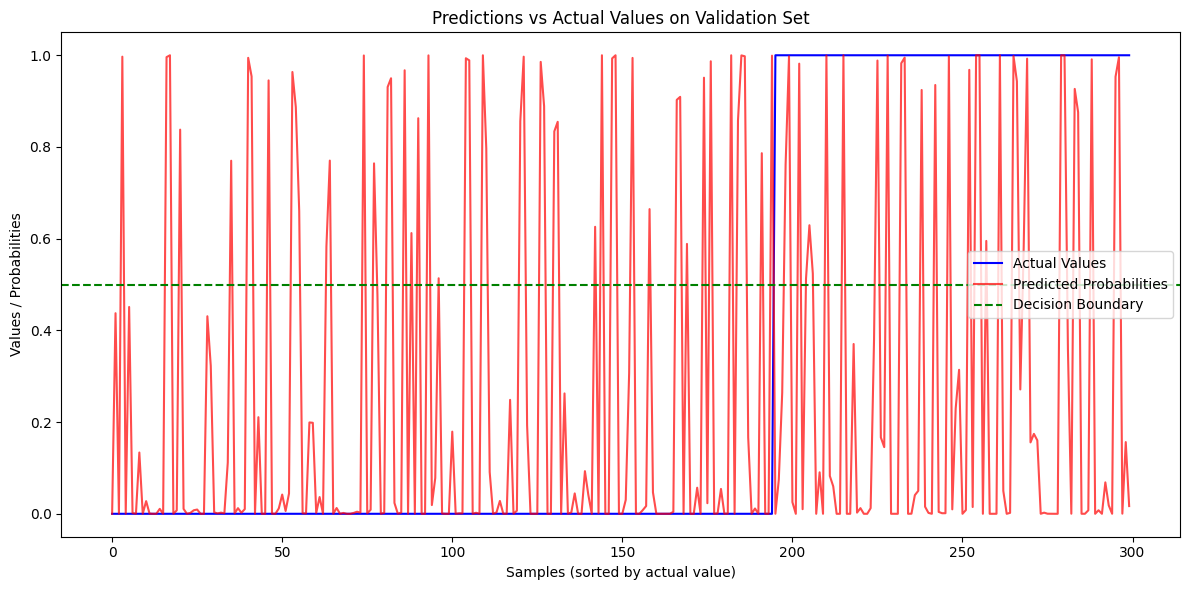

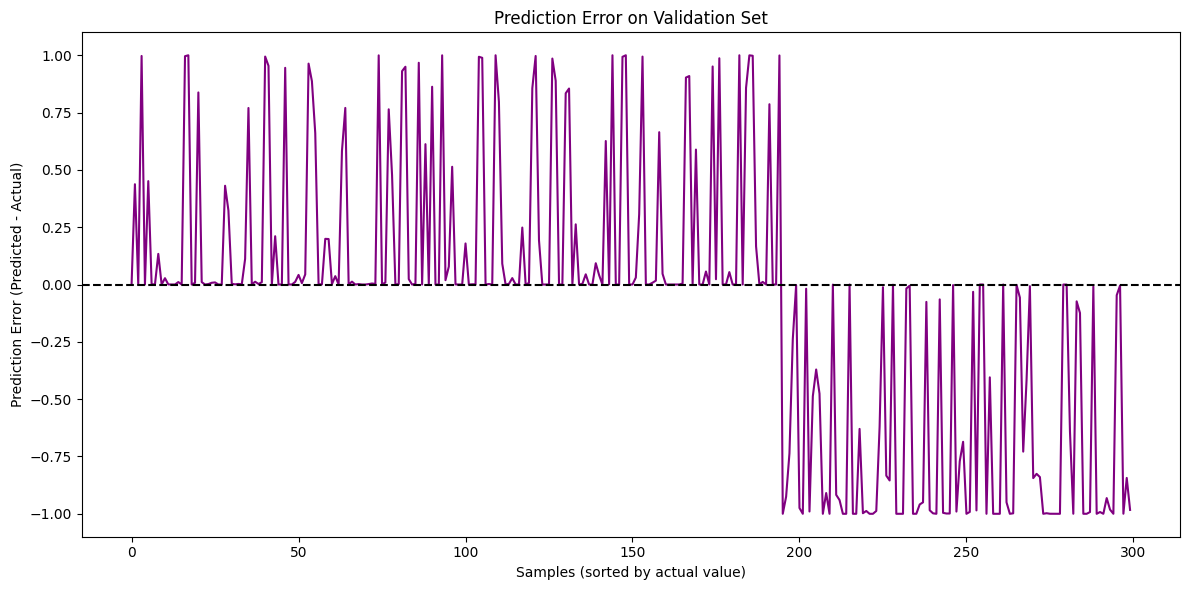

Confusion Matrix:
[[146  49]
 [ 74  31]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.75      0.70       195
         1.0       0.39      0.30      0.34       105

    accuracy                           0.59       300
   macro avg       0.53      0.52      0.52       300
weighted avg       0.57      0.59      0.57       300

ROC AUC Score: 0.5628
Model saved successfully.


In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# 1. Set up paths and load data
base_dir = "C:\\Users\\User\\Documents\\FTL_Capstone_Project\\FTL_Cohort3_Group10\\data"
train_dir = os.path.join(base_dir, "training")
train_labels_file = os.path.join(base_dir, "labels_training.csv")

# Load labels
train_labels_df = pd.read_csv(train_labels_file)

# 2. Prepare file paths and labels
image_files = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.endswith('.tif')]
labels = train_labels_df['label'].values

# 3. Split data into training and validation sets (80% train, 20% validation)
train_files, val_files, train_labels, val_labels = train_test_split(
    image_files, labels, test_size=0.2, random_state=42
)

# 4. Define data loading and preprocessing function
def load_and_preprocess_image(file_path):
    # Load and preprocess the image
    with Image.open(file_path) as img:
        img = img.convert('RGB').resize((101, 101))
        img_array = np.array(img).astype(np.float32) / 255.0
    
    # Create additional features
    grayscale = np.mean(img_array, axis=-1, keepdims=True)
    dx, dy = np.gradient(grayscale[:,:,0])
    edge_magnitude = np.sqrt(dx**2 + dy**2)
    texture = np.abs(grayscale - np.mean(grayscale))
    
    # Combine all features
    features = np.concatenate([img_array, grayscale, edge_magnitude[..., np.newaxis], texture], axis=-1)
    return features

# 5. Prepare datasets
def prepare_dataset(file_paths, labels):
    images = [load_and_preprocess_image(file_path) for file_path in file_paths]
    dataset = tf.data.Dataset.from_tensor_slices((np.array(images), np.array(labels, dtype=np.float32)))
    return dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset = prepare_dataset(train_files, train_labels)
val_dataset = prepare_dataset(val_files, val_labels)

# 6. Create the model
def create_model():
    model = models.Sequential([
        layers.Input(shape=(101, 101, 6)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create and compile the model
model = create_model()
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# 7. Train the model
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset)

# 8. Evaluate the model
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 9. Make predictions on validation set
val_predictions = model.predict(val_dataset)

# 10. Visualize predictions vs actual values
val_labels_array = np.concatenate([labels for _, labels in val_dataset])
val_predictions_flat = val_predictions.flatten()

# Sort the data points by actual values for a cleaner line plot
sorted_indices = np.argsort(val_labels_array)
sorted_actual = val_labels_array[sorted_indices]
sorted_predicted = val_predictions_flat[sorted_indices]

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(range(len(sorted_actual)), sorted_actual, label='Actual Values', color='blue')

# Plot predicted probabilities
plt.plot(range(len(sorted_predicted)), sorted_predicted, label='Predicted Probabilities', color='red', alpha=0.7)

# Add decision boundary
plt.axhline(y=0.5, color='green', linestyle='--', label='Decision Boundary')

plt.xlabel('Samples (sorted by actual value)')
plt.ylabel('Values / Probabilities')
plt.title('Predictions vs Actual Values on Validation Set')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: You can also add a second plot to show the difference
plt.figure(figsize=(12, 6))
plt.plot(range(len(sorted_actual)), sorted_predicted - sorted_actual, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Samples (sorted by actual value)')
plt.ylabel('Prediction Error (Predicted - Actual)')
plt.title('Prediction Error on Validation Set')
plt.tight_layout()
plt.show()

# 11. Calculate and print confusion matrix and classification report
val_predictions_binary = (val_predictions > 0.5).astype(int)
cm = confusion_matrix(val_labels_array, val_predictions_binary)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(val_labels_array, val_predictions_binary))

# 12. Calculate and print ROC AUC score
roc_auc = roc_auc_score(val_labels_array, val_predictions)
print(f"ROC AUC Score: {roc_auc:.4f}")

# 13. Save the model
model.save('solar_panel_detection_model.keras')
print("Model saved successfully.")